Introduction

The Loan application status prediction data set that we are analyzing is a data set which includes details of applicant who have applied for loan.The dataset includes details like Loan ID,Gender,Married ,Dependents,Education,Self Employed,Applicant income,Coapplicant income,loan amount,loan amount term,and credit history. In this project I will be constructing logestic regression models to map from input variables to output variables, and see how well we are able to predict the status of loan status.

Dataset

The dataset used in this project loan_status.csv that contains 614 instances with 13 features.

In [69]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Uploading data set

In [70]:
df=pd.read_csv("loan_status.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [71]:
df.keys #checking keys

<bound method NDFrame.keys of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [72]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

- Loan_ID -Number alloted to loan application

- Gender-  Male-Female

- Married- Status of person single, married

- Dependents- No.of dependennts person

- Education- Applicant education details

- Self_Employed- Y/N

- ApplicantIncome- Income of Applicant

- CoapplicantIncome- Income of coapplicant

- Loan_Amount-       Required loan amount by applicant

- Loan_Amount_Term-  Term of loan amount

- Credit History-    Credit score of applicant

- Property_Area -  urban/semi-urban/Rural

- Loan Status-    approved or not approved

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The data is mixed with object,Integers and float

In [75]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data set has null value in Gender, Married,Dependents,Self employed, Loan amount,Loan amount term and credit history.
Lets remove it according to columns type

In [76]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) #Removing of null value

In [77]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [78]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [79]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [80]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [81]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [82]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [83]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


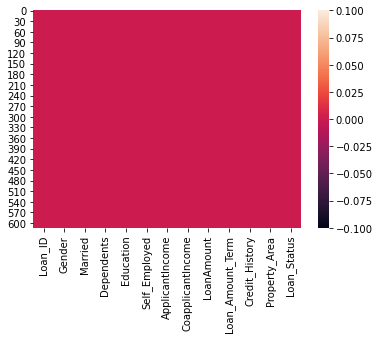

In [85]:
sns.heatmap(df.isnull())

In [86]:
df=df.drop(columns=['Loan_ID'])
categorical_columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


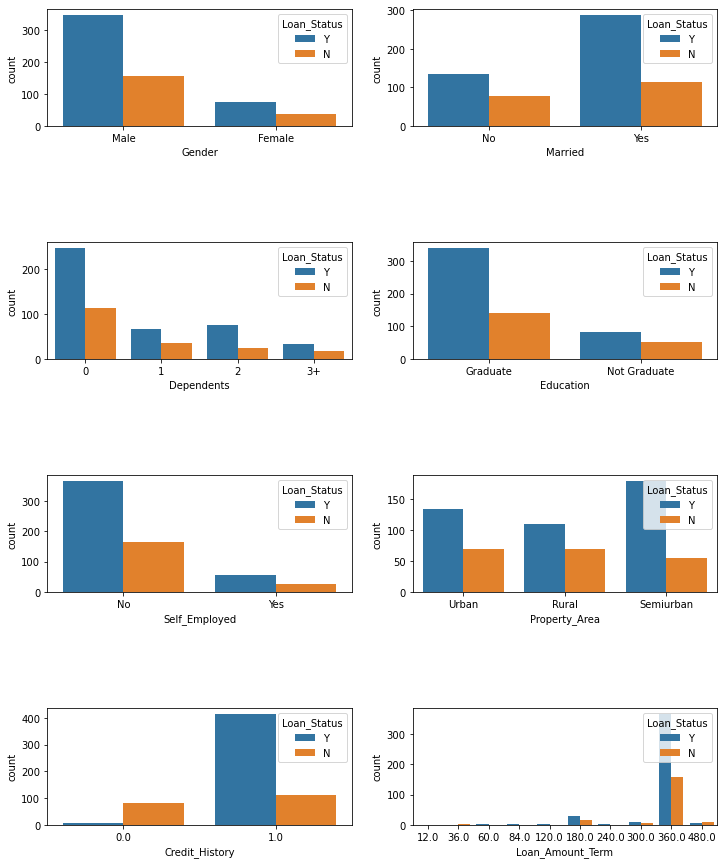

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)    

With the help of above graphics we cames to know that,
Male applicants approval status is higher than women.
Married couple got more approval of loan than unmarried.
Less dependency lead to more chances of loan approval.
Graduate applicants have higher proportion of loan approval.
Self employed applicant have lessor proportion of loan approval than other.
Loan approval rate is higher for semiurban properties than urban and rural.
Good credit history application have more chances to got the loan approval.
Majority of approval got loan for 360 days.

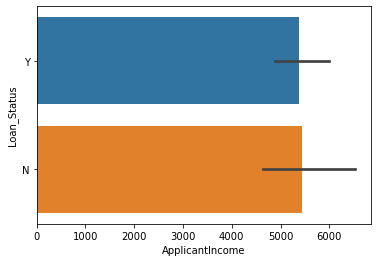

In [88]:
sns.barplot(x="ApplicantIncome",y="Loan_Status",data=df)

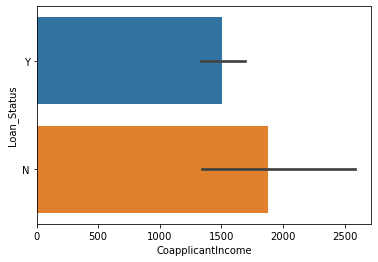

In [89]:
sns.barplot(x="CoapplicantIncome",y="Loan_Status",data=df)

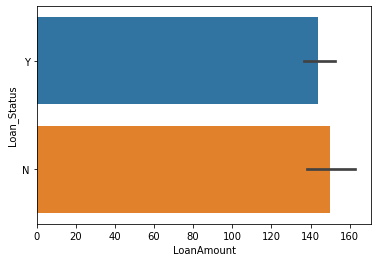

In [90]:
sns.barplot(x="LoanAmount",y="Loan_Status",data=df)

The above numeric graphics shows that there is not much correlation betweeen loan status and applicant income, coapplicant income and loan amount

In [91]:
for col in df.select_dtypes(['object']).columns: #Checking categorical data
    print(col, ':', sorted(df[col].unique()))

Gender : ['Female', 'Male']
Married : ['No', 'Yes']
Dependents : ['0', '1', '2', '3+']
Education : ['Graduate', 'Not Graduate']
Self_Employed : ['No', 'Yes']
Property_Area : ['Rural', 'Semiurban', 'Urban']
Loan_Status : ['N', 'Y']


In [92]:
var_cat = df.select_dtypes(include=[object])
var_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


Converting categorical data into numerical

In [93]:
var_cat = var_cat.columns.tolist()
var_cat = ['Loan_ID','Gender','Married','Dependennts','Education','Self_Employed','Property_Area','Loan_Status']

var_cat
['Loan_ID','Gender','Married','Dependennts','Education','Self_Employed','Property_Area','Loan_Status']

['Loan_ID',
 'Gender',
 'Married',
 'Dependennts',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [94]:
from sklearn.preprocessing import LabelEncoder #Converting catagorical data into numerical
LE=LabelEncoder()

df["Gender"]=LE.fit_transform(df["Gender"])
df["Married"]=LE.fit_transform(df["Married"])
df["Dependents"]=LE.fit_transform(df["Dependents"])
df["Education"]=LE.fit_transform(df["Education"])
df["Self_Employed"]=LE.fit_transform(df["Self_Employed"])
df["Property_Area"]=LE.fit_transform(df["Property_Area"])
df["Loan_Status"]=LE.fit_transform(df["Loan_Status"])

Checking correlation

In [95]:
dfcor=df.corr() 
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


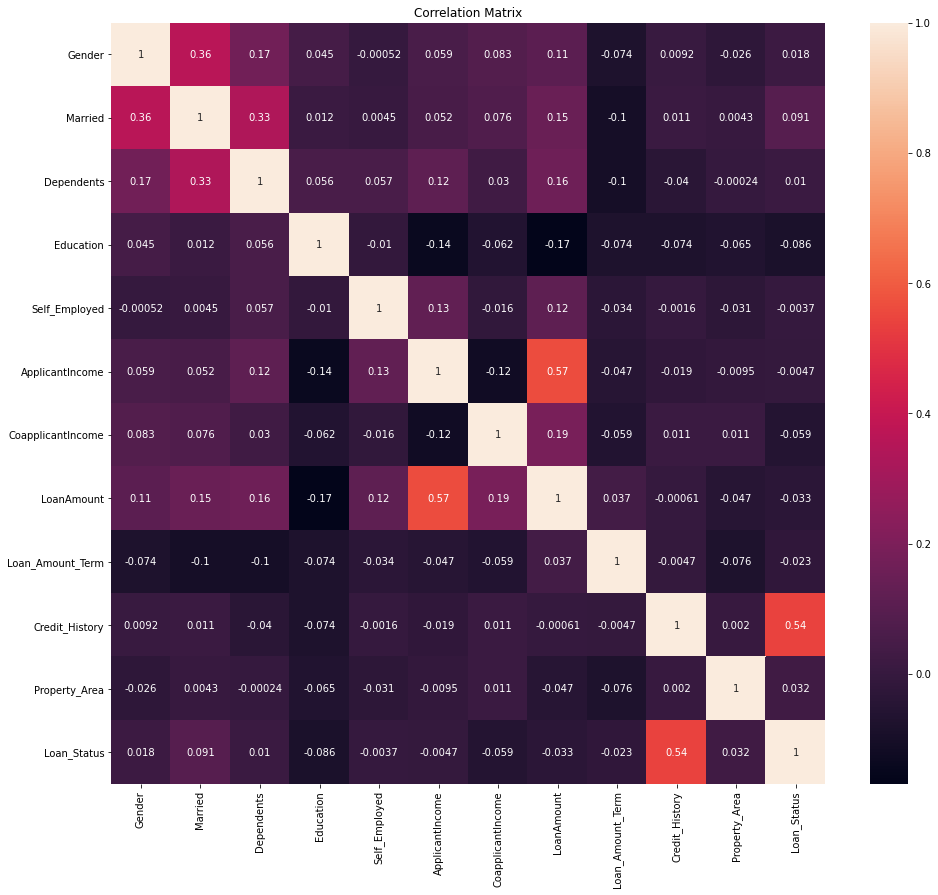

In [96]:
plt.figure(figsize=(16,14))
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

some of the variable like credit history,married,property area,gender,dependents have moderate correlation with target variable and some of the variable like self employed,applicant income,loan amount term,loan amount,coapplicant income and education have negative correlation with target variable

In [97]:
corr_matrix=df.corr()

In [98]:
corr_matrix["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

Gender                  AxesSubplot(0.125,0.772143;0.168478x0.107857)
Married              AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Dependents           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Education            AxesSubplot(0.731522,0.772143;0.168478x0.107857)
Self_Employed           AxesSubplot(0.125,0.642714;0.168478x0.107857)
ApplicantIncome      AxesSubplot(0.327174,0.642714;0.168478x0.107857)
CoapplicantIncome    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
LoanAmount           AxesSubplot(0.731522,0.642714;0.168478x0.107857)
Loan_Amount_Term        AxesSubplot(0.125,0.513286;0.168478x0.107857)
Credit_History       AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Property_Area        AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Loan_Status          AxesSubplot(0.731522,0.513286;0.168478x0.107857)
dtype: object

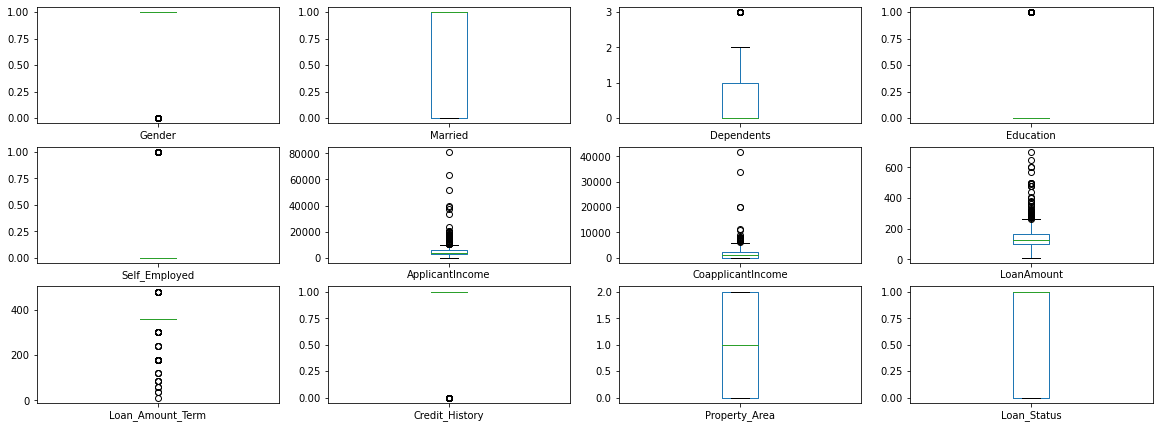

In [99]:
df.plot(kind='box',subplots=True, layout=(6,4), figsize= (20,15))

Applicant income,coapplicant income,loan amount term columns have outliers.
We will remove it with the help of Zscore

In [100]:
#removing outlieers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [101]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [102]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(614, 12)
(577, 12)


In [103]:
loss_percent=(614-577)/614*100
print(loss_percent)

6.026058631921824


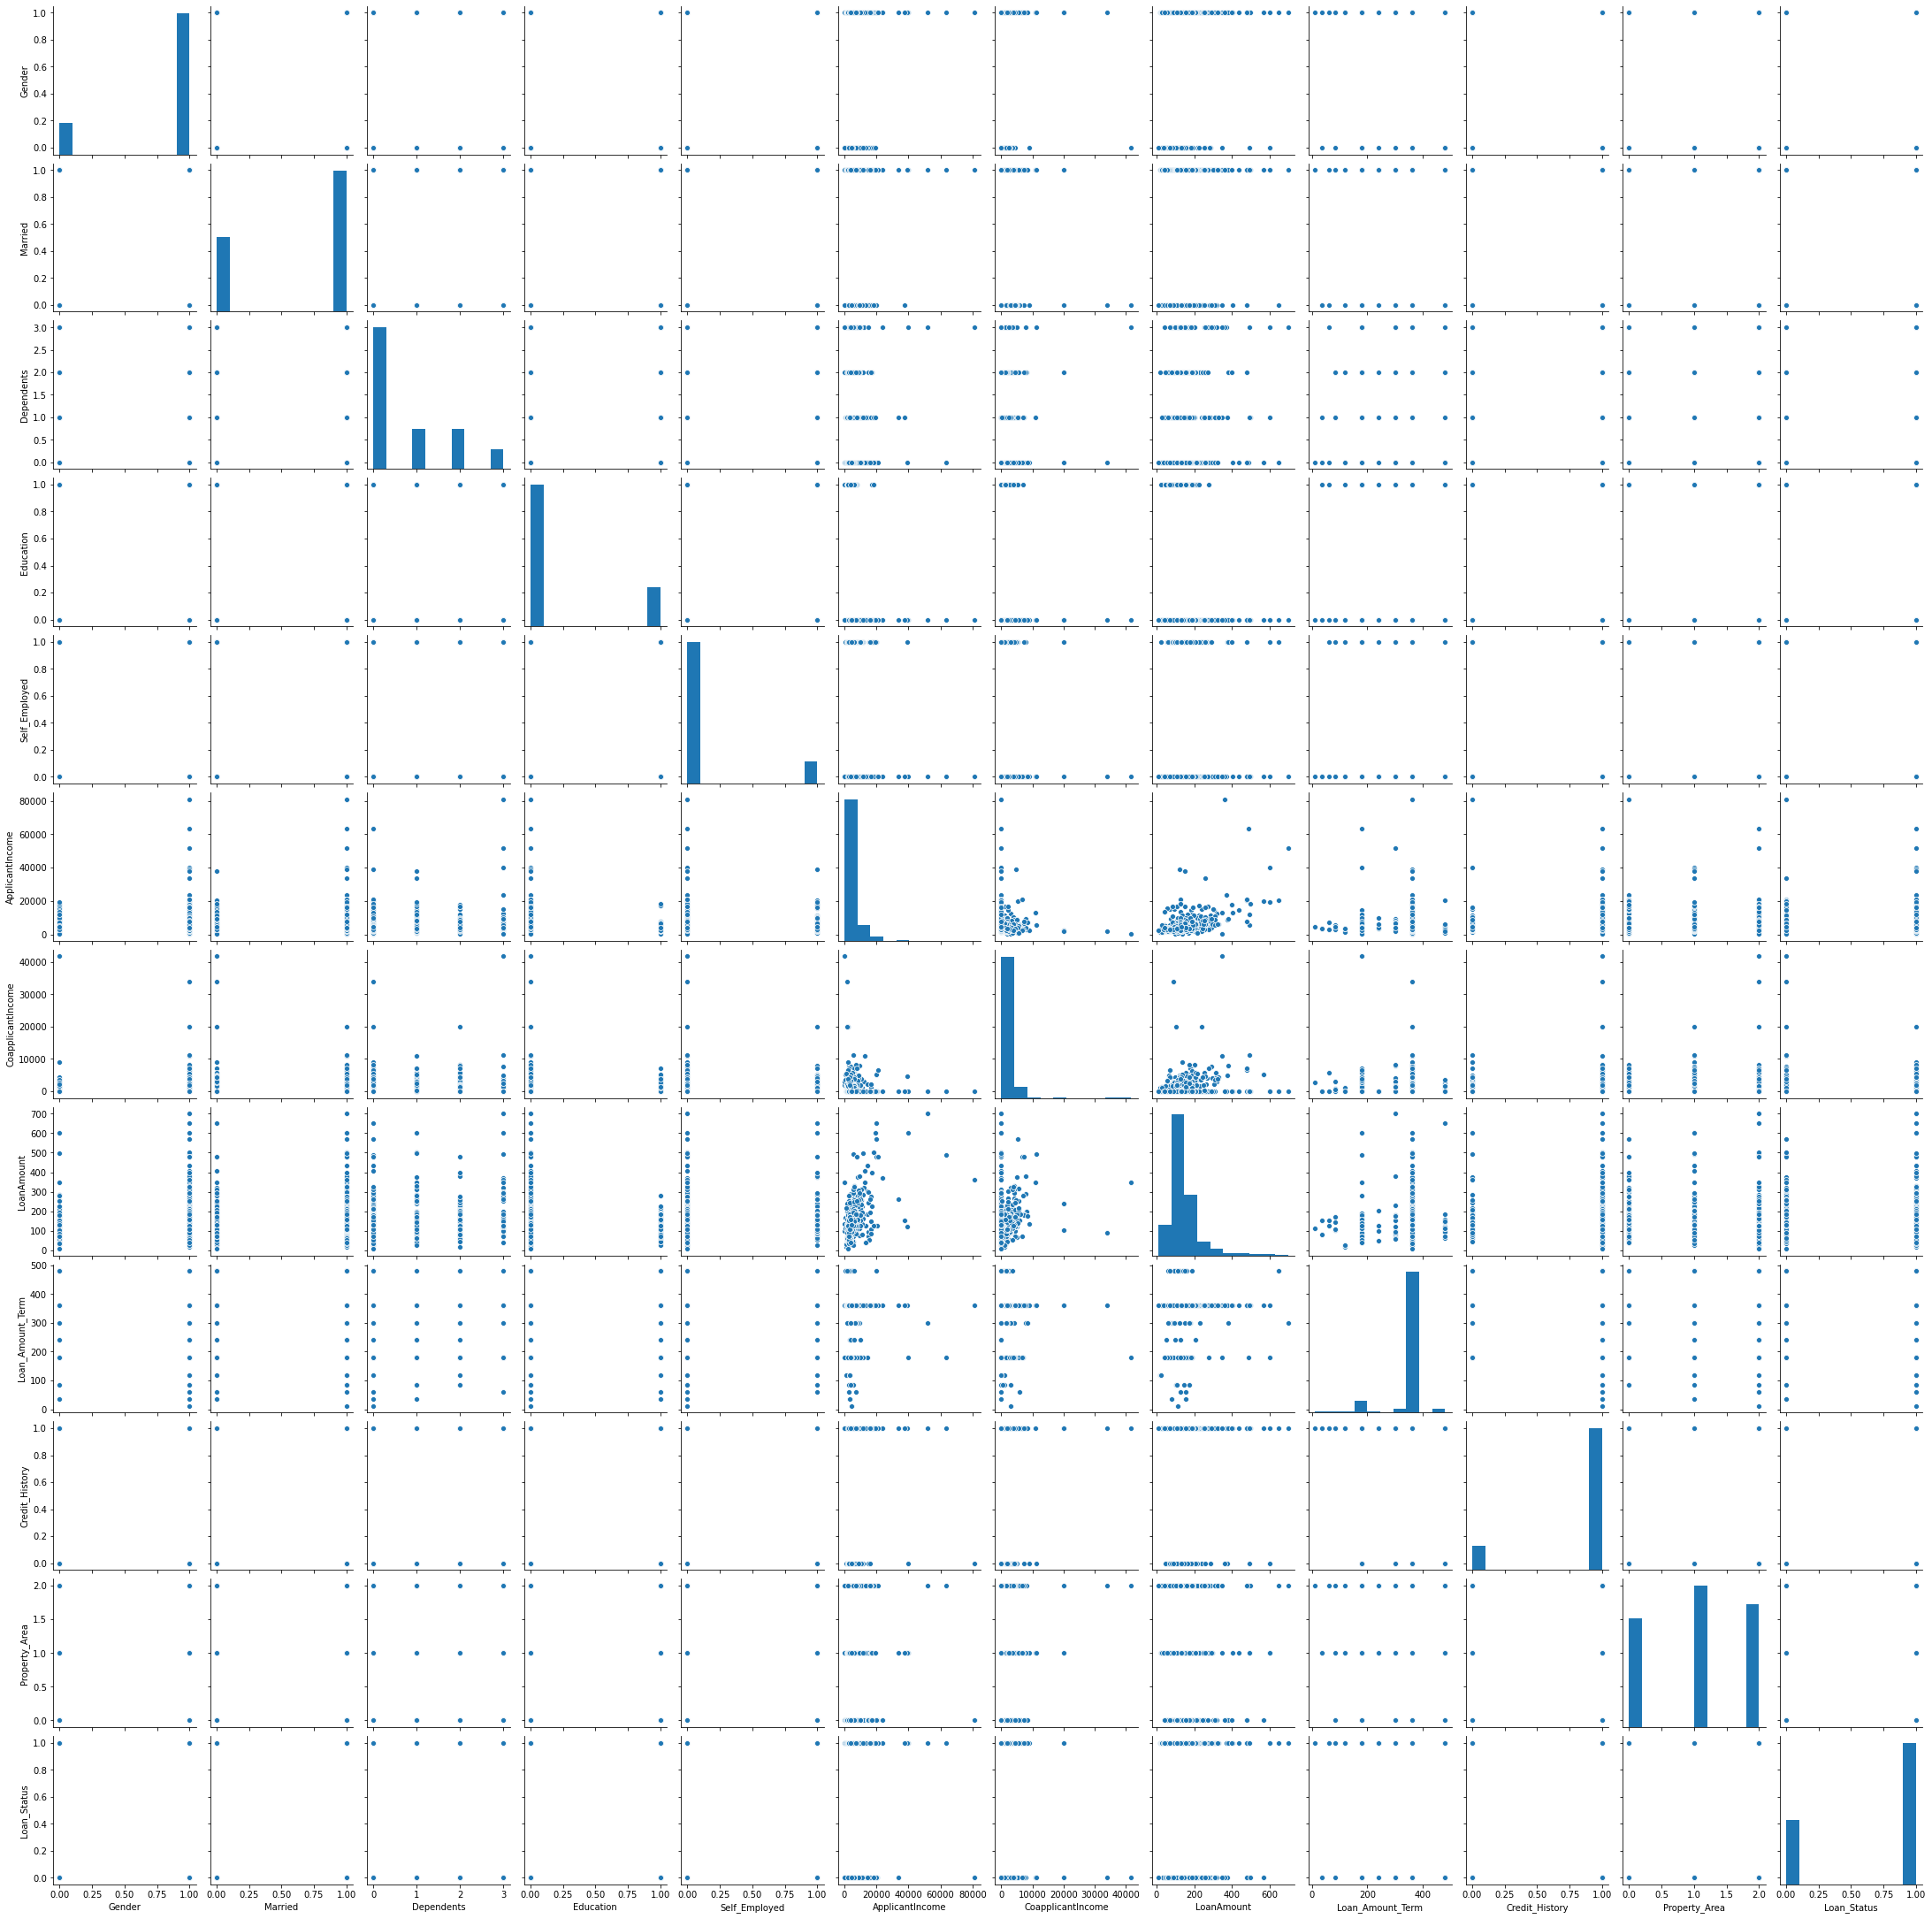

In [104]:
sns.pairplot(df)
plt.show()

most of the columns has either right skewed or left skewed.Gender,married,loan amount term,credit history,property area and loan status has negatively skewed and dependents ,education,self employed applicant income coapplicant income and loan amount have positively skewed

In [105]:
df.skew() # Checking Skewness

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Removing skewness

In [106]:
skew=("ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History")
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [107]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.151578
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Splitting traget variable

In [108]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

scalling data with the help of standardScaler

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.2732313 ,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.2732313 ,
        -2.42876026, -0.04760721]])

Training testing and validating dataset

In [110]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)


best accuracy is  0.9666666666666667 on Random_state 11


In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=11)

In [112]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train, y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    

0.9666666666666667
[[11  1]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.95      1.00      0.97        18

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [113]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
predlr=dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8
[[ 8  4]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.80      0.89      0.84        18

    accuracy                           0.80        30
   macro avg       0.80      0.78      0.78        30
weighted avg       0.80      0.80      0.80        30



In [114]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
predlr=svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9666666666666667
[[11  1]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.95      1.00      0.97        18

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [115]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predlr=rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9
[[11  1]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.94      0.89      0.91        18

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Validating data with the help of Cross val score

In [116]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x,y,cv=5)
print("Cross validation of LogisticRegression model:",scr.mean())

Cross validation of LogisticRegression model: 0.809462881514061


In [117]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x,y,cv=5)
print("Cross validation of DecisionTree model:",scr.mean())

Cross validation of DecisionTree model: 0.7231507397041184


In [118]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x,y,cv=5)
print("Cross validation of SVC model:",scr.mean())

Cross validation of SVC model: 0.8062108489937359


In [119]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x,y,cv=5)
print("Cross validation of RandomForest model:",scr.mean())

Cross validation of RandomForest model: 0.791536718645875


Minimum difference in accuracy and cross validation score is for DecissionTreeClassifier so this is our best model

In [120]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [121]:
y_pred_prob=dt.predict_proba(x_test)[:,1]

In [122]:
y_pred_prob

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [123]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [124]:
fpr

array([0.        , 0.33333333, 1.        ])

In [125]:
tpr

array([0.        , 0.88888889, 1.        ])

In [126]:
thresholds

array([2., 1., 0.])

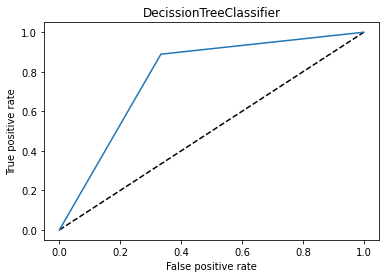

In [127]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecissionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecissionTreeClassifier')
plt.show()

In [128]:
auc_score=roc_auc_score(y_test,dt.predict(x_test))

In [129]:
print(auc_score)

0.7777777777777778


Hyper tunning dataset with the help of GridSearchCV

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
#Creating parameter list to pass in GridSearch

parameters={'max_depth':np.arange(2,15),'criterion':['gini','entropy']}

In [132]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [133]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [134]:
GCV.best_params_ #Printing the best parameter found by GridSearch

{'criterion': 'entropy', 'max_depth': 2}

In [135]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [136]:
accuracy_score(y_test,GCV_pred)

0.9666666666666667

In [137]:
import joblib
joblib.dump(dt,"loan_status.csv.obj")


['loan_status.csv.obj']

In [138]:
p=joblib.load("loan_status.csv.obj")

In [139]:
import numpy as np
a=np.array(y_test)
predicted=np.array(dt.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))

In [140]:
df_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,1
5,0,0
6,0,0
7,1,1
8,1,0
9,0,0
